<a href="https://colab.research.google.com/github/indrasn0wal/MLDLS2022/blob/main/Perceptron_(Assignment_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, we are going to implement the given Perceptron model using the data we used in univariate regression model in our first model.

In [32]:
#importing lib
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving HousingPrices-Amsterdam.csv to HousingPrices-Amsterdam (2).csv
User uploaded file "HousingPrices-Amsterdam.csv" with length 9242 bytes


In [34]:
df= pd.read_csv('HousingPrices-Amsterdam.csv')
df.head()

,Area,Price
0,64,685000.0
1,60,475000.0
2,109,850000.0
3,128,580000.0
4,138,720000.0


In [35]:
X = df.iloc[:,0].values
Y = df.iloc[:,1].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, xs, y_train, ys = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
#defining a single layer; single neuron model
model = tf.keras.Sequential([keras.layers.Dense(units=3, activation='relu', input_shape=[1])])
model.add(Dense(1))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


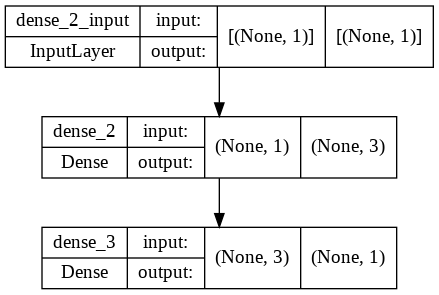

In [38]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [50]:
#defining the model evaluation for backpropogation
model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])

In [54]:
#training the model with iterations (No. of front & back propogation)
run_model = model.fit(X_train.reshape(-1,1),y_train.reshape(-1,1), epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 5ms/step - loss: 294962593792.0000 - accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 294999097344.0000 - accuracy: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 295054376960.0000 - accuracy: 0.0000e+00
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 295013416960.0000 - accuracy: 0.0000e+00
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 295023116288.0000 - accuracy: 0.0000e+00
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 294987268096.0000 - accuracy: 0.0000e+00
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 295028948992.0000 - accuracy: 0.0000e+00
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 295714390016.0000 - accuracy: 0.0000e+00
Epoch 9/100
21/21 [==============================] - 0s 7ms/step - loss: 295497531392.00

In [42]:
print(run_model.history.keys())

dict_keys(['loss'])


In [55]:
pred=model.predict(xs.reshape(-1,1))

In [56]:
from sklearn.metrics import r2_score
r2_score(ys,pred)

-0.004664578758919902

In [59]:
model.predict([[200]])

array([[641350.8]], dtype=float32)

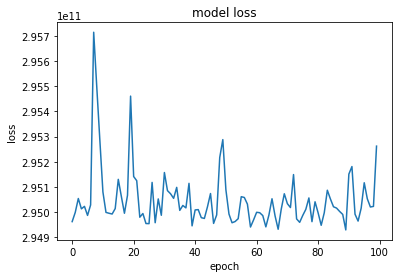

In [57]:
# summarize history for accuracy
plt.plot(run_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()